In [0]:
%matplotlib inline
from pylab import *



---
# Get the data

* Load the Olivetti Face dataset
* Import the smile/no smile reference data

In [2]:
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
faces.keys()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


dict_keys(['data', 'images', 'target', 'DESCR'])

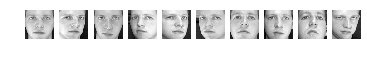

In [3]:
# Display some images
for i in range(10):
    face = faces.images[i]
    subplot(1, 10, i + 1)
    imshow(face.reshape((64, 64)), cmap='gray')
    axis('off')

In [4]:
# Download results-smile-GT-BLS.xml from https://blesaux.github.io/teaching/IOGS-machine-learning
# Then load results-smile-GT-BLS.xml from computer in the "/content/" directory
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))


Saving results-smile-GT-BLS.xml to results-smile-GT-BLS.xml
User uploaded file "results-smile-GT-BLS.xml" with length 5341 bytes


In [5]:
# Open reference data
results = json.load(open('/content/results-smile-GT-BLS.xml'))

y = list(results.values())
print(y)
yy = [int(yy==True) for yy in y]
print(yy)

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, True, False, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, False, True, False, False, False, False, False, False, True, False, True, False, False, True, False, False, False, False, False, False, False, True, False, False, True, True, False, True, False, False, False, True, True, False, False, True, True, False, True, False, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, True, False, True, False, False, True, False, False, False, True, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, 

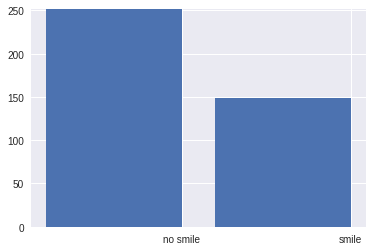

In [6]:
# Analyze reference data
yes, no = (sum([results[x] == True for x in results]), 
            sum([results[x] == False for x in results]))
bar([0, 1], [no, yes])
ylim(0, max(yes, no))
xticks([0.4, 1.4], ['no smile', 'smile']);

In [0]:
smiling_indices = [int(i) for i in results if results[i] == True]

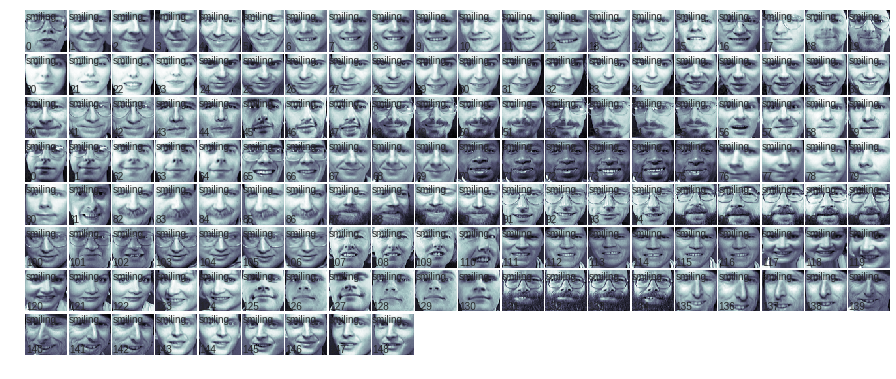

In [8]:
fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(len(smiling_indices)):
    # plot the images in a matrix of 20x20
    p = fig.add_subplot(20, 20, i + 1)
    p.imshow(faces.images[smiling_indices[i]], cmap=plt.cm.bone)
    
    # label the image with the target value
    p.text(0, 14, "smiling")
    p.text(0, 60, str(i))
    p.axis('off')



---

# Feature extraction

* Compute Histogram of Gradients (HoGs) features on **all images**
* Understand what HoGs are

In [13]:
from __future__ import division, print_function
from time import time

import numpy as np
import matplotlib.pyplot as plt

from skimage import feature

# Compute HoG features
hog_vec = []
hog_vis = []
for i in range(len(faces.images)):
  image = faces.images[i]
  hvec, hvis = feature.hog(image, visualise=True)
  hog_vec.append(hvec)
  hog_vis.append(hvis)

print('Number of features of size... ',np.array(hog_vec).shape)

/usr/local/lib/python3.6/dist-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


(400, 2916)


400 107


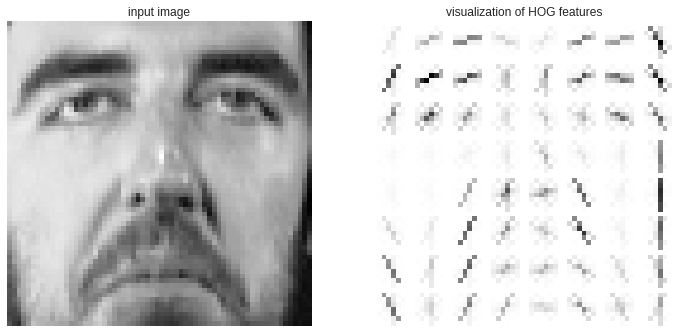

In [14]:
# Understand HOG features
from random import randint
ii = randint(0, len(faces.images))
print(len(faces.images), ii)

fig, ax = plt.subplots(1, 2, figsize=(12, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow( faces.images[ii], cmap='gray')
ax[0].set_title('input image')

ax[1].imshow(hog_vis[ii])
ax[1].set_title('visualization of HOG features');

In [15]:
print(hog_vec[ii])
print(hog_vec[ii].shape)
print( np.max(hog_vec) )
print( np.min(hog_vec) )

[0.00713902 0.01410465 0.00751407 ... 0.0021546  0.00092756 0.0089962 ]
(2916,)
0.26926859742906506
0.0




---

# Prepare train and test

* Split data in training / test set

Info: https://scikit-learn.org/stable/model_selection.html

In [17]:
from sklearn.model_selection import train_test_split

indices = np.arange(len(yy))
#print(indices)

hog_train, hog_test, yy_train, yy_test, idx_train, idx_test = train_test_split(
    hog_vec, yy, indices, test_size=0.2, random_state=42)

#print(hog_train)
#print(yy_train)
#print(hog_test)
print(yy_test)
print(idx_test)


[0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]
[209 280  33 210  93  84 329  94 266 126   9 361  56  72 132  42 278 376
 231 385  77  15 391 271   0 396 114 225 262 104 395 193 261  57 232 116
 113 342 158 141 381  55  76  25  82 382 148 181  22 173  46 321 338  70
 374  39 223 172  30 152 124 294 255  78 101  31 352 268 394  73 320 140
   5  45 388 246 227 369 176 289]




---
# Trees

* Built a tree classifier on HOG Features.
* Info: https://scikit-learn.org/stable/modules/tree.html
* Evaluate the trained model
* Info: https://scikit-learn.org/stable/modules/model_evaluation.html

In [0]:
# Train decision tree
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit( hog_train, yy_train )

In [19]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

'iris.pdf'

In [0]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=None,  
                     class_names=["False","True"],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

[0.07748713 0.04185558 0.00125069 ... 0.00138294 0.00069922 0.02731483]
Smile ref is  0
Smile prediction is  [0]


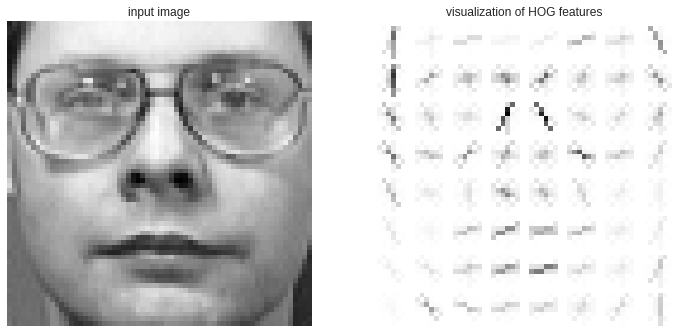

In [23]:
# Test the model on a single image
from random import randrange
rnd_test = random_index = randrange(len(yy_test))


print(hog_test[rnd_test])
print('Smile ref is ',yy_test[rnd_test])

pred = clf.predict(hog_test[rnd_test].reshape(1, -1))
print('Smile prediction is ',pred)

rnd_image = faces.images[idx_test[rnd_test]]
rnd_hog_vis = hog_vis[idx_test[rnd_test]]
#hog_vec, hog_vis = feature.hog(image, visualise=True)

fig, ax = plt.subplots(1, 2, figsize=(12, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(rnd_image, cmap='gray')
ax[0].set_title('input image')

ax[1].imshow(rnd_hog_vis)
ax[1].set_title('visualization of HOG features');


In [28]:
# Compute predictions for all test, and estimate performance statistics
preds = clf.predict(hog_test)
print('Smile predictions are ',preds)

import sklearn.metrics as perf

oa = perf.accuracy_score(yy_test, preds)
bas = perf.balanced_accuracy_score(yy_test, preds)
print(oa,bas)
cm = perf.confusion_matrix(yy_test, preds)
print(cm/len(preds))

Smile predictions are  [1 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0
 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0]
0.775 0.749154834347532
[[0.5375 0.1   ]
 [0.125  0.2375]]




---

# Random Forest: a bagging example

In this part, the objective it to build a **custom random forest**.

**After the course**, check built-in scikit-learn random forests: https://scikit-learn.org/stable/modules/ensemble.html

* Train various trees on subsets of the training set
* Use a voting procedure to aggregate the individual predictions on the 
* Evaluate:
  * Evaluate the custom forest;
  * Compare with previous decision tree;
  * Compare with individual trees of the forest.

Numpy tips: [np.arange](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.arange.html), [numpy.sum](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.sum.html), [numpy.mean](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.mean.html), [numpy.where](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.where.html)

In [71]:
# The training data are: hog_train, yy_train, idx_train
# The test data are: hog_test, yy_test, idx_test
# First prepare several subsets
# Second train decision trees on each subset

idx_train = np.arange(len(yy_train))
#print(idx_train)


nb_trees = 20
forest = []

for ss in range(nb_trees):
  # bagging for subset
  hog_train_sub, hog_test_sub, yy_train_sub, yy_test_sub, idx_train_sub, idx_test_sub = train_test_split(
      hog_train, yy_train, idx_train, test_size=0.2, random_state=42)
  print(yy_test_sub)
  print(idx_test_sub)

  # single tree training
  clf = tree.DecisionTreeClassifier(max_depth=5, splitter="random")
  clf = clf.fit( hog_train_sub, yy_train_sub )
  
  # single tree evaluation
  curr_train_pred=clf.predict(hog_train_sub)
  curr_test_pred=clf.predict(hog_test_sub)
  print(perf.accuracy_score( yy_train_sub, curr_train_pred ), perf.accuracy_score( yy_test_sub,curr_test_pred) )
  
  # grow the forest
  forest.append( clf )
  


[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1]
[167 230  25  63   9 110 186 143 244 224  90  76  82 240 172 119 202  77
  55 104 203 211 198 139  42 213 297  33  73 183  75   5 168 157 300  78
 176 284 222  84   7 193 285 281  46   3 260 194 226 177  57  94 289  45
  17 185 268  60  24 114 210 148 309 258]
0.96875 0.65625
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1]
[167 230  25  63   9 110 186 143 244 224  90  76  82 240 172 119 202  77
  55 104 203 211 198 139  42 213 297  33  73 183  75   5 168 157 300  78
 176 284 222  84   7 193 285 281  46   3 260 194 226 177  57  94 289  45
  17 185 268  60  24 114 210 148 309 258]
0.95703125 0.734375
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0

In [72]:
print(len(forest))

oa=np.empty([nb_trees])
all_preds=[]
for ss in range(len(forest)):# nb_trees
  test_pred=forest[ss].predict(hog_test)
  all_preds.append(test_pred)
  oa[ss] = perf.accuracy_score( yy_test, test_pred )
  print(oa[ss])
  
aa = np.mean(oa)
print('Average test acc. of trees : ',aa)

all_preds=np.array(all_preds)
print(all_preds.shape)
print(all_preds)


20
0.725
0.65
0.7625
0.7125
0.675
0.7625
0.6875
0.625
0.725
0.6875
0.725
0.7375
0.8125
0.8
0.6875
0.6875
0.65
0.675
0.675
0.65
Average test acc. of trees :  0.7056250000000001
(20, 80)
[[1 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 1 1 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]


In [73]:
# Vote
gloup = np.sum(all_preds, axis=0)
print(gloup)
final_pred = np.where(gloup > nb_trees/2, 1, 0)
print(final_pred)
final_oa = perf.accuracy_score( yy_test, final_pred )
print(final_oa)

[ 4  2  2 12 14 11  8  9  6  6  3 13  8  7  2 19 11  2  0 11 11  2 10 15
  2  7 19  4  2  0 15  4 16  3  3 20  6 14  1  4 12  7  7  8 10  4  2  8
  7  4 17  1  0 10  2  4 10  3  3  3  1  8 17  8  1  1 11 15  2  3  4  0
  1 18  9 10  5  4  0  1]
[1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0
 1 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1
 0 1 1 1 0 0]
0.8125
